In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
df = load_iris()
df = pd.DataFrame(np.c_[df['data'],df['target']],columns = np.append(df['feature_names'],['target']))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
x = df.drop('target',axis=1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
x = np.array(x)

In [6]:
# Finding the best value of CLUSTER_COUNT using Elbow method
from sklearn.cluster import KMeans
cluster_count_test = 10
wcss = []

for i in range(1,cluster_count_test+1):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans = kmeans.fit(x)
    wcss.append(kmeans.inertia_)

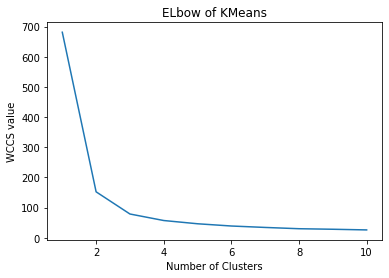

In [7]:
# Plot wccs values wrt number of clusters
plt.plot(np.arange(1,11),wcss)
plt.title('ELbow of KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('WCCS value')
plt.show()

In [8]:
# Applying kmeans with optimal number of clusters gained by Elbow method
cluster_count = 3
kmeans = KMeans(n_clusters=cluster_count,random_state=0)
kmeans = kmeans.fit(x)

y_pred = kmeans.predict(x) # predicted labels
centroids = kmeans.cluster_centers_

In [9]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

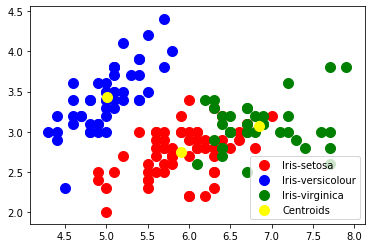

In [11]:
#Visualising the clusters
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

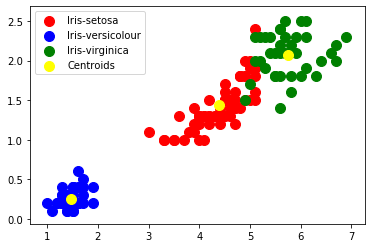

In [12]:
#Visualising the clusters
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(centroids[:, 2], centroids[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

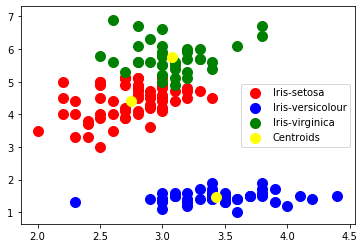

In [13]:
#Visualising the clusters
plt.scatter(x[y_pred == 0, 1], x[y_pred == 0, 2], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 1], x[y_pred == 1, 2], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 1], x[y_pred == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(centroids[:, 1], centroids[:,2], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()